# Новый раздел

In [13]:
!gdown --id 1rxqLa6k-ZqKMuMZaXHh_MfOeDUbZWtu0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1rxqLa6k-ZqKMuMZaXHh_MfOeDUbZWtu0
From (redirected): https://drive.google.com/uc?id=1rxqLa6k-ZqKMuMZaXHh_MfOeDUbZWtu0&confirm=t&uuid=bdb26563-7f38-4858-8707-4fbed3b05281
To: /content/dino-dragon.zip
100% 109M/109M [00:00<00:00, 214MB/s] 


In [14]:
!unzip -q dino-dragon.zip


replace test/dino/001db8b8-33ff-44b3-8f50-325f4ab4f713.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: !unzip -o -q file_name.zip
error:  invalid response [!unzip -o]
replace test/dino/001db8b8-33ff-44b3-8f50-325f4ab4f713.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [ -q file_]
replace test/dino/001db8b8-33ff-44b3-8f50-325f4ab4f713.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/dino/009d2929-87f4-43d8-8b7d-501d8a006823.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [A]ll
error:  invalid response [[A]ll]
replace test/dino/009d2929-87f4-43d8-8b7d-501d8a006823.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
!ls /content/



dino-dragon.zip  sample_data  test  train


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создание объектов ImageDataGenerator для предварительной обработки изображений
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Создание генераторов для обучающих и тестовых данных
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Используется sigmoid, так как это бинарная классификация
])

from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.002, momentum=0.8),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [19]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)


Epoch 1/10
80/80 [==============================] - 41s 492ms/step - loss: 0.6503 - accuracy: 0.6412 - val_loss: 0.4383 - val_accuracy: 0.8122
Epoch 2/10
80/80 [==============================] - 40s 498ms/step - loss: 0.4569 - accuracy: 0.7999 - val_loss: 0.4933 - val_accuracy: 0.7741
Epoch 3/10
80/80 [==============================] - 39s 492ms/step - loss: 0.3843 - accuracy: 0.8325 - val_loss: 0.3626 - val_accuracy: 0.8579
Epoch 4/10
80/80 [==============================] - 42s 519ms/step - loss: 0.2772 - accuracy: 0.8883 - val_loss: 0.3263 - val_accuracy: 0.8706
Epoch 5/10
80/80 [==============================] - 40s 495ms/step - loss: 0.2054 - accuracy: 0.9285 - val_loss: 0.2905 - val_accuracy: 0.8680
Epoch 6/10
80/80 [==============================] - 42s 529ms/step - loss: 0.1107 - accuracy: 0.9693 - val_loss: 0.3205 - val_accuracy: 0.8553
Epoch 7/10
80/80 [==============================] - 44s 547ms/step - loss: 0.0395 - accuracy: 0.9944 - val_loss: 0.2912 - val_accuracy: 0.8782

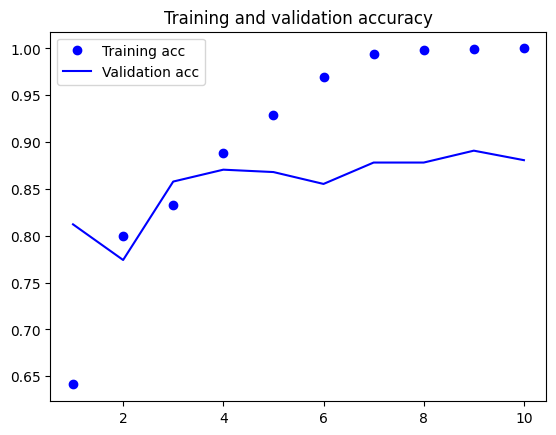

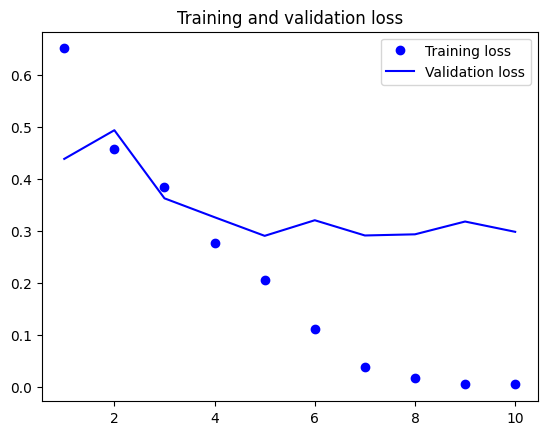

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [22]:
import numpy as np

# Расчет медианы точности обучения
median_accuracy = np.median(history.history['accuracy'])

# Расчет стандартного отклонения потерь в процессе обучения
std_loss = np.std(history.history['loss'])

print(f"Медиана точности обучения: {median_accuracy}")
print(f"Стандартное отклонение потерь: {std_loss}")


Медиана точности обучения: 0.9488707780838013
Стандартное отклонение потерь: 0.211731105906966


In [24]:
# Продолжение обучения модели на дополнительных 10 эпохах
history_additional = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Вычисление среднего значения потерь на тестовом наборе данных по всем эпохам после аугментации
mean_test_loss = np.mean(history_additional.history['val_loss'])

# Вычисление среднего значения точности на тестовом наборе данных за последние 5 эпох после аугментации
mean_last_5_accuracy = np.mean(history_additional.history['val_accuracy'][-5:])

print("Среднее значение потерь на тестовом наборе данных после аугментации:", mean_test_loss)
print("Среднее значение точности на тестовом наборе данных за последние 5 эпох после аугментации:", mean_last_5_accuracy)


Epoch 1/10
80/80 [==============================] - 41s 502ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3041 - val_accuracy: 0.8858
Epoch 2/10
80/80 [==============================] - 41s 504ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.8883
Epoch 3/10
80/80 [==============================] - 40s 506ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3188 - val_accuracy: 0.8782
Epoch 4/10
80/80 [==============================] - 41s 511ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3228 - val_accuracy: 0.8883
Epoch 5/10
80/80 [==============================] - 42s 519ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3257 - val_accuracy: 0.8832
Epoch 6/10
80/80 [==============================] - 42s 522ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3297 - val_accuracy: 0.8807
Epoch 7/10
80/80 [==============================] - 41s 509ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3348 - val_accuracy: 0.8832